# データの読み込み

In [1]:
import pandas as pd
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [2]:
df_test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1,NaN,S


# 前処理について記述せよ。

### Q1:前処理とは何か。
### A1:機械学習にかける前に、データセットの中身を調査して、適切な状態に加工すること。
### Q2:なぜ前処理を行う必要があるのか。
### A2:・それを行うか否かでモデルの学習結果に大きな影響を及ぼすため。・それを行うことによって活用するモデルの選択肢を増やすことができるため。
### Q3:前処理は具体的に何を行うか(3つ以上記述せよ)
### A3:
### （１）欠損値を処理する。
###     a. リストワイズ法：欠損値がある行を消去する。
###         ->データ数がどんどん減ってゆくことで学習材料も減っていくので奨励されるメソッドではない。
###     b. 平均値代入法：欠損値があるカラムの平均を計算し、その計算された平均を欠損値へ代入する。
###         ->デメリット:既存の変数との分散・共分散・相関を薄めてしまう点。
###     c.回帰代入法：欠損が発生している変数と欠損の発生に影響している変数とで回帰を作り、作られた回帰式を使って欠損を補完する。
###         ->デメリット:相関やR2を過大推定してしまうとともに、分散などを過小推定してしまう。回帰代入された値はすべて単一の回帰直線上に乗ってくるため。対処方法 -> stochastic regression imputationにより回帰予測値にランダム誤差を加えて代入する。
### d.完全情報最尤推定法(FIML)：欠損値パターンに応じた個別の尤度関数を仮定した最尤推定によって欠損値を埋める。MCAR だけでな く MAR であってもバイアスのない推定値を得ることができる。
### e.多重代入法：stochastic regression imputationは欠損値が代入されたデータセットを唯一の分析対象とし、もともと欠損値が多かったかどうかは統計的推測に反映されない。これは欠損値が多い場合、標準誤差を過小評価してしまうことになる。そこで多重代入法は、欠損値が代入されたデータセットを複数作成して、その結果を統合することで欠損値データの統計的推測を行う。MCAR だけでな く MAR であってもバイアスのない推定値を得ることができる。
### （２）カテゴリカルデータを処理する。
### a.順序特徴量のマッピング
### b.クラスラベルのエンコーディング
### c.名義特徴量のone-hotエンコーディング
### （３）外れ値を処理する。
### 理由：ほんのわずなか外れ値でもモデルの学習結果に重大な影響を及ぼすことがしばしばあり、特にサンプルサイズが小さいと、この影響は甚大になるため。
### ・四分位範囲(IQR)における「第一四分位数から引いた値」と「第三四分位数から足した値」の範囲から外れたものを外れ値として除外する。
### （４）データのスケール処理を行う。
### 理由：例えば正規化することを考える。生データセットにおいては、しばしば広範に特徴量が分布している。（スケール、尺度の違う特徴量が包含されている。e.g. 身長と体重）いっぽう、使用するclassifierが２点間の特徴量の距離をユークリッド距離として計算する場合、ここで大きく離れている特徴量があると、それ（スケールの違い）に引っ張られて全体が支配されてしまう。これを避けるために、正規化することにより学習に使うすべての特徴量の範囲を一定範囲に収める（同様の尺度で計算させる）必要があるため。
### （５）ビニングにより連続値をビンと呼ばれる離散値カテゴリーに置き換える。
### 理由：データセットの特徴量が連続値であっても離散化しビニングで区切ることで決定木回帰などのモデルを使えることができ、線形モデル単独よりも表現力を向上させることができるため。
### Q4:前述した具体的な前処理について、その前処理を行うと何を得ることができるか(記述したそれぞれの前処理例について記述せよ)
### A4:
### （１）欠損値処理・・・完全なデータセット
### （２）カテゴリカルデータ処理・・・データサイエンスの対象となれるデータセット
### （３）外れ値処理・・・統計的推測を歪ませる懸念要因を除いたデータセット
### （４）スケール処理・・・使用するモデルのアルゴリズムに適したデータセット
### （５）ビニング処理・・・線形モデル単独よりも汎化能力を向上させる機械学習に使えるデータセット

### Q5:データを確認する際にどのような点を見るとよいか、3つ以上記述せよ。
### A5:（１）欠損値がないか（２）カテゴリカルデータがないか（３）外れ値がないか（４）外れ値のチェックも含め特徴量の分布状況はどのようになっているか（５）（１）〜（４）を踏まえて、どんなモデルを選択することが最も適しているか

# 前処理を行う

In [3]:
#preprocessing_1

def simplify_ages(df):
    df.Age=df.Age.fillna(-0.5)
    bins=(-1,0,5,12,18,25,35,60,120)#range[(-1,0],(0,5],,,(60,120]]
    group_names=['Unknowun','Baby','Child','Teenager','Student','YoungAdult','Adult','Senior']
    categories=pd.cut(df.Age,bins,labels=group_names)
    df.Age=categories
    return df

def simplify_cabins(df):
    df.Cabin=df.Cabin.fillna('N')
    df.Cabin=df.Cabin.apply(lambda x:x[0])#Slice to display the first character.
    return df

def simplify_fares(df):
    df.Fare=df.Fare.fillna(-0.5)
    bins=(-1,0,8,15,31,1000)
    group_names=['Unknown','1_quartile','2_quartile','3_quartile','4_quartile']
    categories=pd.cut(df.Fare,bins,labels=group_names)
    df.Fare=categories
    return df

def format_name(df):
    df['Lname']=df.Name.apply(lambda x:x.split(' ')[0])#split space & extract first element.
    df['Nameprefix']=df.Name.apply(lambda x:x.split(' ')[1])#extract second element.
    return df

def drop_features(df):
    return df.drop(['Ticket','Name','Embarked'],axis=1)

def transform_features(df):
    df=simplify_ages(df)
    df=simplify_cabins(df)
    df=simplify_fares(df)
    df=format_name(df)
    df=drop_features(df)
    return df

data_train=transform_features(df_train)
data_test=transform_features(df_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,Nameprefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,YoungAdult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,YoungAdult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,YoungAdult,0,0,2_quartile,N,"Allen,",Mr.


In [4]:
#preprocessing_2

from sklearn import preprocessing
def encode_features(df_train,df_test):
    features=['Fare','Cabin','Age','Sex','Lname','Nameprefix']
    df_combined=pd.concat([df_train[features],df_test[features]])
    
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(df_combined[feature])
        df_train[feature]=le.transform(df_train[feature])
        df_test[feature]=le.transform(df_test[feature])
    return df_train,df_test

data_train,data_test=encode_features(data_train,data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,Nameprefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int64
Cabin          891 non-null int64
Lname          891 non-null int64
Nameprefix     891 non-null int64
dtypes: int64(11)
memory usage: 76.6 KB


# 前処理の内容について記述せよ。


## Q1:それぞれのメソッドが何を行っているか記述せよ。
## A1:カテゴリカルデータの前処理を行なっている。
### （１）df=simplify_ages：欠損値処理する。（NaNに-0.5を代入）ビニングする。（0,1-5,6-12,13-18,19-25,26-35,36-60,61-120才のrangeに、それぞれgroup_namesを設定し振り分け）
### （２）df=simplify_cabins：欠損値処理する。（NaNにNを代入）スライスして最初の文字を表示させる。
### （３）df=simplify_fares：欠損値処理する。（NaNに-0.5を代入）ビニングする。（0,1-8,6-15,16-31,32-1000のrangeに、それぞれgroup_namesを設定し振り分け）
### （４）df=format_name：Nameカラムの各インデックスにおいて、スペースでスプリットして最初の要素と２番目の要素を抽出し、新設したカラム 'Lname'と'Nameprefix'のindiciesとしてそれぞれ配置する。
### （５）df=drop_features：今回の機械学習に使用しない特徴量をカラムごと除外する。
### （６）encode_features：train,testデータセットにおけるobjectタイプの特徴量をラベルエンコーダーでintegerに処理する。
## Q2:それぞれなぜそのようなことを行っているか記述せよ(それによって得られるメリットまで考察すること)
## A2:
### （１）欠損値処理により完全なデータセットにすることで、データセットを丸ごと分析にかけられるようにする。各々のrangeのビンに割り振り、後ほど行われるラベルエンコーディングに備える。得られるメリットは、生存予測に影響すると思われるAgeデータに対して、単に個人別に貼り付けられた数値ではなく年代別のデータとして分析することができる。
### （２）欠損値処理により完全なデータセットにすることで、データセットを丸ごと分析にかけられるようにして、後ほど行われるラベルエンコーディングに備える。得られるメリットは、objectからintegerにすることで機械学習にかけられる。
### （３）欠損値処理により完全なデータセットにすることで、データセットを丸ごと分析にかけられるようにする。各々のrangeのビンに割り振り、後ほど行われるラベルエンコーディングに備える。単に個人別に貼り付けられた数値ではなく四分位別のデータとして分析することができる。
### （４）一つの名義特徴量からunique部分とNameprefix部分に分割してそれぞれエンコーディングすることでsckit-learn等のライブラリで学習できるようになる。
### （５）機械学習で使用しない特徴量をドロップすることで機械学習に余分な影響を与える可能性を排除する。
### （６）ラベルエンコーダーによってカテゴリカルデータをデータサイエンスすることができる。

# モデル選択について記述せよ。

## Q1:今回は、生存予測（分類）を行いますが、この分類について使用できそうな手法を4つ以上しらべてその概要をそれぞれ記述せよ。
## A1:
# '''
### （１）線形回帰
### 回帰によって連続値を予測する手法で、説明変数の係数と切片によって値を予測。最小二乗法や最尤推定によって係数と切片を決定する。ビニングにより汎化能力を向上させることもできる。
# '''
### 分類の手法について記述する問題なので、回帰手法である（１）線形回帰を記述してもしょうがない→ロジスティック回帰について記述する。
### （１’）ロジスティック回帰
### シグモイド関数の性質（極小値は０へ、極大値は１へ限りなく近づいていく）を利用する→０〜１なので、確率として考えられる→閾値を定義して、それを境に０or１のバイナリ変数で説明する→すなわち、分類する。
### （２）決定木
### 属性とその値の組｛属性1＝値1，属性2＝値2,…，属性n＝値n｝によって表現されたデータをいくつかのクラスと呼ぶものにツリー状に分類する。
### （３）SVM
### 分類にも回帰にも使える手法。マージンを最大化することで汎化能力を高める線形モデル・特徴量を高次元空間へと移し分類する非線形モデルがある。
### （４）k-近傍法
### 教師あり学習におけるクラス判別手法。学習データをベクトル空間上にプロットしておき、新たなデータを得られたら、そこから距離が近い順に任意のK個を取得し、多数決でデータが属するクラスを推定する。


## Q2:その手法の長所/短所をそれぞれ3つずつ、記述したすべての手法において記述せよ
## A2:
# '''
### （１）線形回帰
### 長所：①可視性に優れる。②決定木回帰と比較すると、外挿ができる、つまり訓練データのレンジの外側に対して予測ができる。③ビニングにより複雑なモデル構築も可能。
### 短所：①データセットによっては前処理に負担がかかる②特徴選択機能が内蔵されたモデルとは違い、分析者が有効な特徴量を選び出す必要がある。③学習の結果を評価するにも決定係数R2を自由度調整済み決定係数とするなど注意点がある。④データセットが非線形傾向の場合は精度が落ちる。
# '''
### （１’）ロジスティック回帰
### 長所：①パラメトリックなので説明性に優れる。②単純なクラス分類だけではなく確率としての予測が可能。③多クラス分類にも対応。
### 短所：①線形モデルなので前処理にコストがかかる②あくまで線形識別関数なので、非線形になるとムリ。③ランダムフォレストではなく、あえてロジスティック回帰を選ぶ決定的はメリットはそんなに多くない？
### （２）決定木
### 長所：①可視性に優れる。②複雑なモデル構築も可能。③データセットの前提条件に寛大なので線形モデルと比較して前処理の負担が少ない。
### 短所：①外れ値のために枝が増えて木全体が大きくなってしまい、計算量が大きくなる。② ①が過学習に繋がる。③データセットが少し変わっただけで木構造や判別ルールが大きく変わってしまう。
### （３）SVM
### 長所：①特徴量が増えても精度が高い。②外れ値の存在が境界線に影響を与えない＝モデル全体に影響を与える懸念がない。③単純に直線では分けられない非線形な問題にも対処可能である。
### 短所：①多クラス分類の１対１方式においては、n数のクラスから２個を選ぶ組合せnC2分だけ計算を行うため、特徴量が増えるごとに時間がかかる。②１対他方式においては、各SVMにおいて2つのクラスのバランスが悪い。③各SVMによる予測に差が出てそれぞれの優劣を決められない。
### （４）k-近傍法
### 長所：①機械学習アルゴリズムの中でも最も単純である。②それにより高速に学習できる。③データセットの前提条件に寛大なので線形モデルと比較して前処理の負担が少ない。
### 短所：①設定したkが適切でなければノイズを拾って精度が落ちる。②モデルを作らないノンパラメトリック手法により、どのパラメータがどう重要なのかが得られにくい③ノンパラメトリック手法により、新たなデータを分類したい場合、学習データすべてとの距離を計算するため識別にかかる時間が長い。

 # モデル選択の基準

### （１）予測精度を重視するのか、中身のわかりやすさ（説明性）を重視するのか。
#### 以下のようなイメージを持っていますが偏見でしょうか。
### （ア）得られたデータセットの学習の先に、未知データを予測することに意義がある＝ 機械学習
#### --> 予測精度 ＞ 説明性：顕著なのはディープラーニング
### （イ）得られたデータセットに対する説明性を追求する＝ 統計学
#### --> 予測精度 ＜ 説明性：パラメトリックな明示性のある線形モデル族、各種の検定という作業
### ビジネス現場におけるデータサイエンティストの立場を想像すると、クライアントの問題を高い精度で予測することはもちろん重要。しかし予測の結果をクライアントに『説明』し納得させるプレゼンにおいては、あまりに中身がブラックボックスでは支障をきたさないか？データサイエンスを専門としない人々に説明する際は、予測精度を重視しつつも、それと並行して決定木のような視認性に優れるモデルや、ランダムフォレストなどにおける変数重要度の計算ができるモデルを選択するという考え方もありそう。
### （２）時間的コストはどこまで費やせるのか。データセットの大きさとモデルの処理内容（アルゴリズムやパラメータ設定）の組み合わせによって選択肢は変わってくる。
### （３）データセットの構成はどのようであるか。特徴量の数、線形性を持っているかどうか。これらと（１）および（２）の内容に応じて、「Microsoft Azure Machine Learning のアルゴリズムの選択方法」チートシートや「アルゴリズム・精度・トレーニング時間、線型性、パラメータ一覧」から選択するモデルの大まかな当たりをつけることができる。
### （４）（オッカムの剃刀）同程度にデータを説明できるならば、より単純なモデルすなわちパラメータ数の少ないものや、より平滑なモデルを選択すべきとの考え方もあり。（朱鷺の杜Wikiより）
### （５）最善のアルゴリズムを探す唯一の方法はすべてを試してみるしかない部分もある。（いわゆる No free lunch）

# モデル選択におけるデータ可視化

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

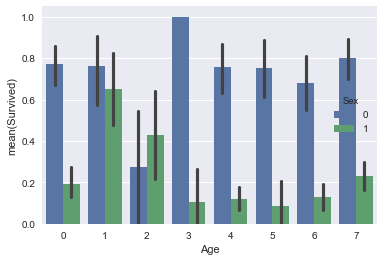

In [7]:
sns.barplot(x='Age',y='Survived',hue='Sex',data=data_train);

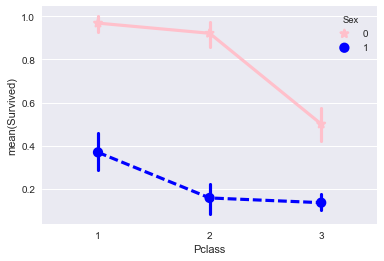

In [8]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=data_train,
              palette={1:"blue",0:"pink"},
              markers=["*","o"],linestyles=["-","--"]
             );

# データ可視化の結果について考察せよ
## Q1:上記の２つの可視化から分かったことについて考察せよ。
## A1:
### （１）圧倒的に女性のほうが生存している。
### （２）男性の生存率で見ると、０歳〜１２歳までの子供の生存率が他の年代よりも突出している。
### （３）男性女性共通点として、１等船客が最も生存率が高く、等級が下がるにつれ生存率も下がる。
## Q2:上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか
## A2:
### データ可視化の考察により、特徴が特定領域に偏っているように見える。したがって、データの傾向が直線に従うことを想定している線形回帰アルゴリズムよりも、非線形傾向にあるデータの分析に向いたアルゴリズムを用いるモデルを検討したほうがよさそう。

# データセットの分割

In [9]:
from sklearn.model_selection import train_test_split

X=data_train.drop(['Survived','PassengerId'],axis=1)
y=data_train['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# ランダムフォレストについて記述せよ
## Q1:決定木とはどのような手法か
### A1:条件分岐によってグループを分割して分類する予測モデルで、属性とその値の組｛属性1＝値1，属性2＝値2,…，属性n＝値n｝によって表現されたデータをいくつかのクラスと呼ぶものにツリー状に分類する。
### （１）どのようなルールで分割するか
### 分割後のグループの不純度が一番小さくなる＝情報量利得が最大となるような基準を選んで分割していく
### （２）不純度を表す関数
### ・エントロピー：ID3アルゴリズム（各独立変数に対し情報量利得が最大のものを選び、それを葉ノードにする操作を木の展開が完了するまで（＝各葉ノードに分類される事例のクラスが1種類になるまで）再帰的に行う）における不純度。
### ・Gini係数：CARTアルゴリズム（目的変数がカテゴリ変数の場合は決定木が得られ、連続値変数の場合は回帰木が得られる）における不純度。
## Q2:ランダムフォレストとはどのような手法か
## A2:
### ・決定木を大量に生成する。
### ・各決定木がアンサンブル学習する。
### ・各決定木の学習結果を集計し、多数決で予測する。
### ・バギング（ブーストラップサンプリングを繰り返して生成した判別器を合成して，より判別精度の高い判別器を生成する方法）と同じように、各決定木のtrainデータセットはブーストラップサンプリングによって生成する。
### ・M個の特徴があるとき，そのうちm個をランダムに選び，その中でCARTのGini係数や，ID3の情報量利得などの規準によって最良の特徴を選ぶ。
### ・木の展開は完了するまで行われ、枝の剪定もなされない。

# ランダムフォレストを使用して、学習を行いましょう。

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(max_depth=15,criterion='gini',random_state=0)
clf.fit(X_train,y_train)

print(clf.score(X_test,y_test))

0.776536312849162


# ハイパーパラメータについて

## Q1:ハイパーパラメーターとは何か
## A1:モデルの複雑さを決めるような次数や正則化パラメータのこと。
## Q2:ランダムフォレストにおいてどのようなハイパーパラメーターがあるか4つ以上記述せよ
## A2:
### （１）n_estimators：決定木の数
### （２）max_features：各決定木で使用する説明変数の数
### （３）max_depth：各決定木の深さ
### （４）min_samples_leaf：決定木の葉に分類されるサンプル数
## Q3:
## 記述したハイパーパラメーターにおいて、それぞれどのような値が存在するか記述せよ（そのハイパーパラメーターを変化させるとどのようなことが起きるかも記述すること）
## A3:
### （１）n_estimators：整数値（デフォルト10）多数決する決定木が増減する。多ければ多いほど良いが計算時間とはトレードオフ。
### （２）max_features：整数値（＝使用数）、浮動小数点（使用数＝説明変数の数*パーセンテージ分）、文字列"auto"（デフォルト設定、使用数＝説明変数の数の２乗根）、None（使用数＝すべての説明変数）精度向上を期待するには使用数を増やすことを検討するが、計算時間とはトレードオフ。
### （３）max_depth：整数値（＝深さ）、None（＝すべての葉が純粋になるまでor min_samples_leafよりも少なくなるまで木が展開される）深ければ深いほど複雑な分岐になるが、過学習を起こしやすくなる。
### （４）min_samples_leaf：整数値（＝葉のサンプル数）、浮動小数点（葉のサンプル数＝サンプル数*パーセンテージ分）、デフォルト設定＝１、デフォルト値より大きく設定する＝途中で展開を止める＝過学習を警戒した設定。


# チューニング

In [11]:
#Searching for optimal Hyper_paramater setting with GridSearchCV.
from sklearn.model_selection import GridSearchCV
#Appling cross validation using KFold.
from sklearn.model_selection import KFold

#Specifing kfold. shuffle=True because our model is Classifier.
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

#Hyper_paramater_turning.
forest_grid_hyparam={'n_estimators':[4,6,9],
                     'max_features':['log2','sqrt','auto'],
                     'criterion':['entropy','gini'],
                     'max_depth':[2,3,5,10,15],
                     'min_samples_split':[2,3,5],
                     'min_samples_leaf':[1,5,8]
                    }

#Searching with GridSearchCV.　cross validation=Kfold. 
forest_grid_search=GridSearchCV(RandomForestClassifier
                                (random_state=0,n_jobs=-1),
                                forest_grid_hyparam,
                                cv=kfold
                               )
forest_grid_search.fit(X_train,y_train)

print(forest_grid_search.best_params_)
print(forest_grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}
0.8314606741573034


In [12]:
best_paras=forest_grid_search.best_params_

random_forest_clf=RandomForestClassifier(random_state=0,n_jobs=-1,
                                     criterion=best_paras['criterion'],
                                     max_depth=best_paras['max_depth'],
                                     max_features=best_paras['max_features'],
                                     min_samples_leaf=best_paras['min_samples_leaf'],
                                     min_samples_split=best_paras['min_samples_split'],
                                     n_estimators=best_paras['n_estimators']
                                    )
random_forest_clf.fit(X_train,y_train)

print(random_forest_clf.score(X_test,y_test))

0.8268156424581006


# 検証について記述せよ
## Q1:検証とは何か。
## A1:モデルの汎化能力を確かめること。
## Q2:なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)
## A2:用意されたデータセットに対してのAccuracyだけを見て評価しても、真の汎化能力は推し量れない。理由は以下２点。
### ①過学習の可能性がある
### ②得られたデータセットに対する説明性 ＜ 未知の特徴に対する予測精度という機械学習のスタンス

## Q3:主な検証方法について2つ以上記述せよ。
## A3:
### （１）Hold out法
### trainデータ,検証データ,testデータに単純に３つに分ける。データ量が少ないと十分な学習と検証ができない。また最終結果が分け方に依存してしまう。
### （２）Precision & Recall
### 偏りのあるデータから学習したモデルの評価は、精度（適合率）Precisionと再現率RecallからF値を求め、その大きさで評価する。
### Precision:予測がclass=1とされたとき、実際にclass=1である割合。
### Recall:実際がclass=1であるとき、正しくclass=1と予測できた割合。
### PrecisionとRecallはトレードオフ。
### F値：PrecisionとRecallを統合して評価するための指標。F = 2Rec*Pre / Rec+Pre
### 【注意点】Precision、Recall、F値はいずれも『class=1』に対して正しいか否かにしか着目しておらず、他に複数ある『class≠1』がどのように判定されていたか、どのような間違い方をしていたか（e.g. class=2をclass=3と誤判定）までは評価できない。

# KFoldについて記述せよ

### ①データセットをランダムなｋ個の集合に分割する。
### ②そのうちのｋ－１個を訓練データとしてパラメータを学習し、のこりの1個の集合で性能を評価する。
### ③こうした組み合わせはｋ通りあるので、k回の検証の結果、最終的な性能評価はｋ個の平均を取って決定される。
### ④これを様々なハイパーパラメータの組に対して行い、平均の性能が最も良かったハイパーパラメータをモデルとして採用する。
### ⑤最も良いハイパーパラメータが決定したら、改めてデータを訓練データとテストデータの2つに分割し、最終的な性能評価を行う。

# KFoldを実施する
## -> GridSearchCVにて実行済み

# どの特徴量が重要であったかを調査する

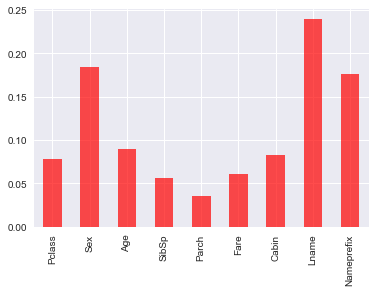

In [13]:
feature_importance=pd.Series(random_forest_clf.feature_importances_,
                             index=list(X_train.columns[::])
                            )
feature_importance.plot(kind='bar',color='r',alpha=0.7)